**SIMPLE LINEAR REGRESSIION**

*Check the path of notebook and set path to your working folder*

In [1]:
import os

In [2]:
notebook_path = os.path.abspath("Salary_Regression.ipyb")
notebook_path
os.chdir(r'C:\Users\Sunidhar\kaggle\coursera\supervised ml\week 1')

**IMPORT MODULES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math,copy
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
plt.style.use(r'C:\Users\Sunidhar\kaggle\coursera\supervised ml\week 1\deeplearning.mplstyle')

**IMPORT DATA**

In [4]:
df = pd.read_csv(r'C:\Users\Sunidhar\kaggle\coursera\supervised ml\week 1\Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


*splitting data into input and output variables*

In [5]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


*y is traget variable*

*x is input variable*

In [6]:
x = df['YearsExperience'].values
y = df['Salary'].values

*checking input values*

In [7]:
print(x)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]


*checking target values*

In [8]:
print(y)

[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


**SPLITTING DATA**

*split the data into training data and testing data*

In [9]:
x_train = np.array(x[0:25])
y_train = np.array(y[0:25])
x_test = np.array(x[25:])
y_test = np.array(y[25:])
print(f"x_train ={x_train}")
print(f"y_train ={y_train}")

x_train =[1.2 1.4 1.6 2.1 2.3 3.  3.1 3.3 3.3 3.8 4.  4.1 4.1 4.2 4.6 5.  5.2 5.4
 6.  6.1 6.9 7.2 8.  8.3 8.8]
y_train =[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432.]


*Find the number of samples*

In [10]:
m = len(x_train)
print(f"number of training examples is {m}")

number of training examples is 25


**PLOT GRAPH** *(Input vs Output)*

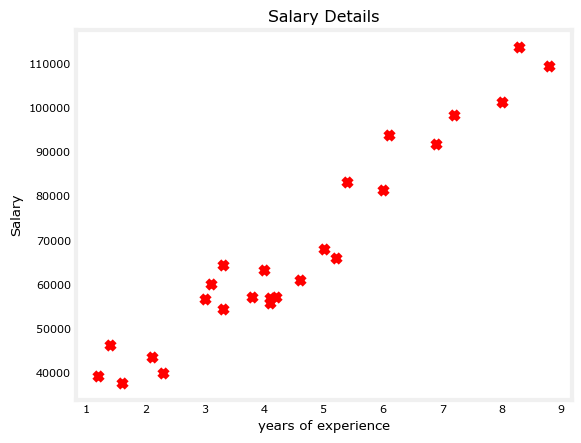

In [11]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Salary Details")
plt.ylabel('Salary')
plt.xlabel('years of experience')
plt.show()

*setting initinal parameters (randomly)*

In [12]:
w = 18500
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 18500
b: 100


**CREATE MODEL**

*use input data to fit the model*

In [13]:
def compute_model_output(x,w,b):
    m = len(x)
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

*use training data in the model*

In [14]:
tmp_f_wb = compute_model_output(x_train,w,b)

**PLOT PREDICTION**

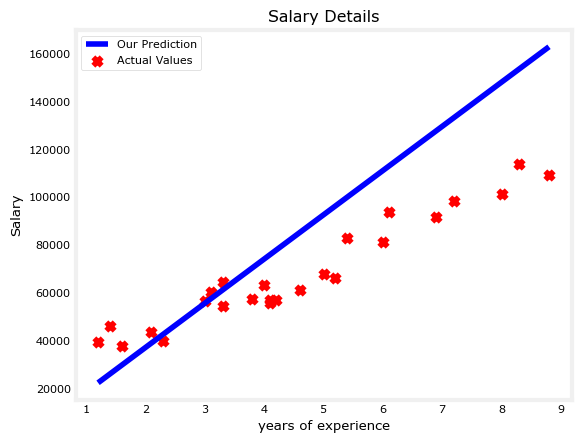

In [15]:
plt.plot(x_train, tmp_f_wb,c = 'b',label='Our Prediction')
plt.scatter(x_train, y_train, marker ='x', c='r', label='Actual Values')

plt.title("Salary Details")
plt.ylabel('Salary')
plt.xlabel('years of experience')
plt.legend()
plt.show()

***COST FUNCTION***

*Caluculate squared error cost function*

In [16]:
def compute_cost(x, y, w, b):
    m = len(x)
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    total_cost = (1/(2*m))*cost_sum
    return total_cost

***GRADIENT***

In [17]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

*Plot Cost vs w graph with gradient*

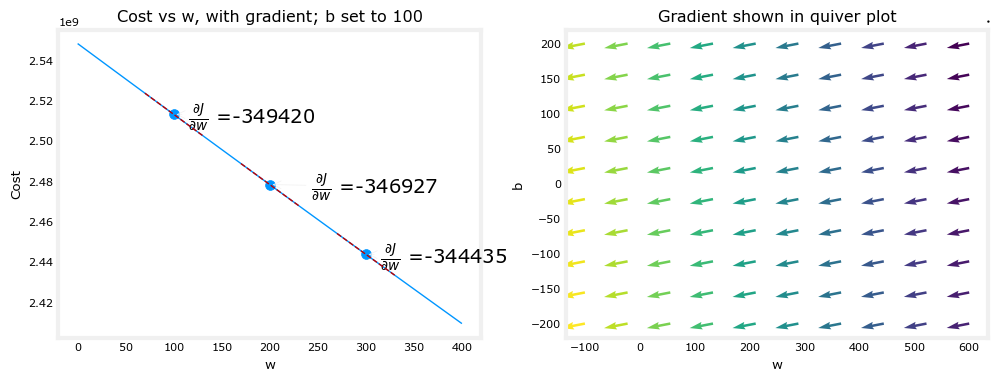

In [18]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

***COMPUTE GRADIENT DESCENT***

*This will return the minimum values of w,b which fits the model*

In [30]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<1000000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [36]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 100000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.43e+09  dj_dw: -3.524e+05, dj_db: -6.803e+04   w:  3.524e+03, b: 6.80266e+02
Iteration 10000: Cost 1.69e+07  dj_dw:  1.686e-05, dj_db: -9.233e-05   w:  9.988e+03, b: 2.28787e+04
Iteration 20000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.28787e+04
Iteration 30000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.28787e+04
Iteration 40000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.28787e+04
Iteration 50000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.28787e+04
Iteration 60000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.28787e+04
Iteration 70000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.28787e+04
Iteration 80000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.28787e+04
Iteration 90000: Cost 1.69e+07  dj_dw:  7.283e-11, dj_db: -1.813e-10   w:  9.988e+03, b: 2.2

*plot cost versus iteration*

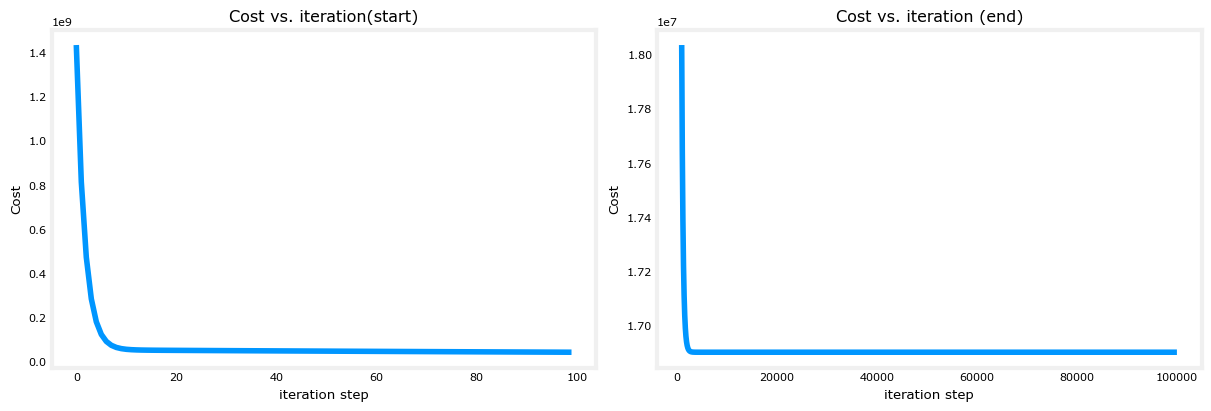

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

*vizualization of min values of parameters*

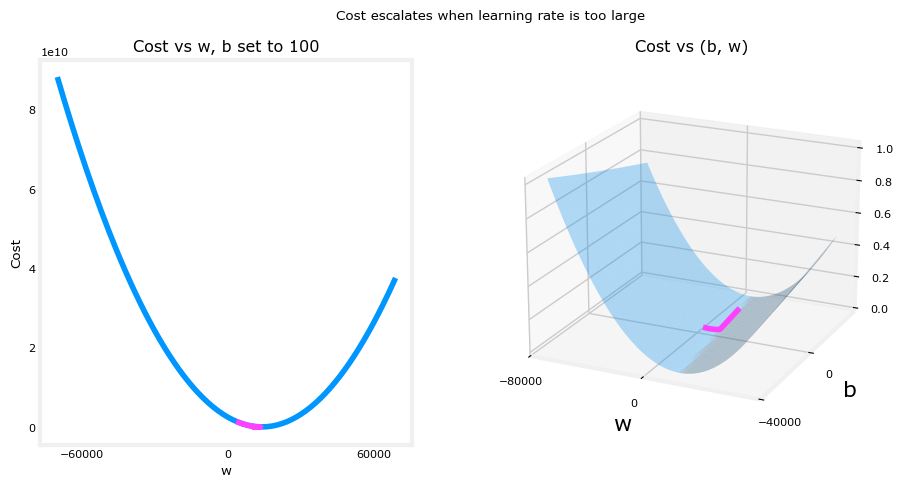

In [38]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

*set the obtained values of parameters*

In [39]:
w = round(w_final,2)
b = round(b_final,2)

**PERFECT FIT MODEL**

*now fit the model with obtained parameters*

In [40]:
def compute_model_output(x,w,b):
    m = len(x)
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

**PLOT THE MODEL**

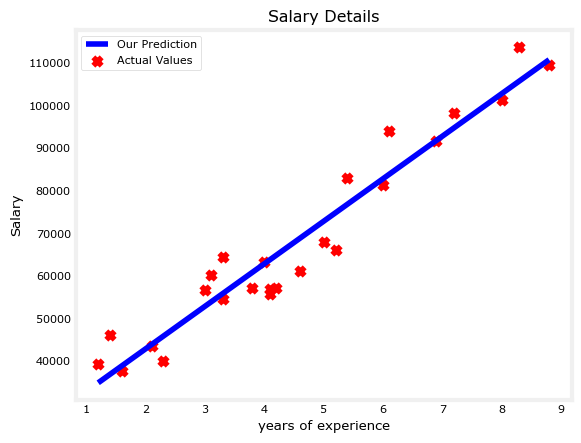

In [41]:
tmp_f_wb = compute_model_output(x_train,w,b)

plt.plot(x_train, tmp_f_wb,c = 'b',label='Our Prediction')
plt.scatter(x_train, y_train, marker ='x', c='r', label='Actual Values')

plt.title("Salary Details")
plt.ylabel('Salary')
plt.xlabel('years of experience')
plt.legend()
plt.show()

**OUTPUT OF THE MODEL**

In [42]:
n = len(x_test)

In [43]:
y_pred = np.zeros(n)
for i in range(n):
    y_pred[i] = w * x[i] + b
print(y_pred)

[34864.914 36862.608 38860.302 43854.537 45852.231]


In [44]:
output = pd.DataFrame( y_test,columns=['Actual'])
output["Predicted"] = y_pred
output

,Actual,Predicted
0,105583.0,34864.914
1,116970.0,36862.608
2,112636.0,38860.302
3,122392.0,43854.537
4,121873.0,45852.231
